通过高级API更简洁地实现多层感知机

In [1]:
import torch
from torch import nn
from d2l import torch as d2l
from train_ch3 import train_ch3

工具函数加载完成！


隐藏层 包含256个隐藏单元，并使用了ReLU激活函数

In [2]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784,256),
                   nn.ReLU(),
                   nn.Linear(256,10))

# 自定义初始化（覆盖默认初始化）
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)  # 这就是随机初始化！
        
net.apply(init_weights)  # 对所有Linear层重新进行随机初始化

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

训练过程

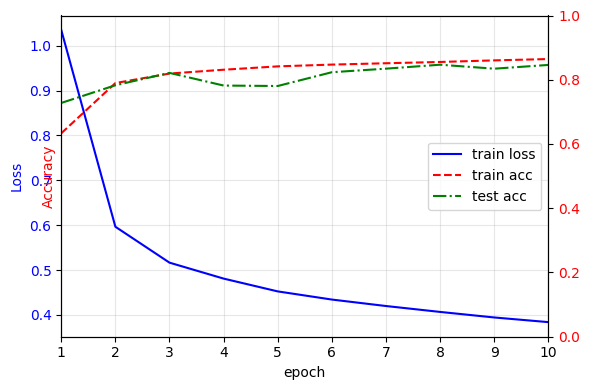

epoch 10, loss 0.384, train acc 0.864, test acc 0.846

训练完成！最终结果：
训练损失: 0.384
训练准确率: 0.864
测试准确率: 0.846


In [3]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)